### import

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ROOT
import ctypes
import glob
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np

Welcome to JupyROOT 6.26/04


In [2]:
ROOT.gROOT.LoadMacro('/home/jykim/workspace/DRAW_and_FITTING/main/Belle2Style.C')
ROOT.SetBelle2Style()


Applying BELLE2 style settings...


In [3]:
# sig_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/phi/D0_massveto_v2_half_1_optimzed_sigext_signalMC_recon_mdst_phi.root")
# signal_tree = sig_file.Get("phi")

# sig_1ab_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_sig_ext_1ab_sigbkg/topo/resultfile/result_phi/standard.root")
# signal_1ab_tree = sig_1ab_file.Get("phi")


In [4]:
mychain = ROOT.TChain("antiKstar")
# file_list = ["/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/ccbar/*.root"]
# file_list = glob.glob("/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/ccbar/*.root")
# file_list = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_sigext_maxFBDT_2ndFBDT/topo/resultfile/result_antiKstar/standard.root'
file_list = glob.glob("/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_sigext_maxFBDT_2ndFBDT/topo/resultfile/result_antiKstar/*.root")

for i in file_list:
    mychain.Add(i)

In [5]:

    
yrange = (-1, 1)
x = ROOT.RooRealVar("D0_M", "M(D^{0}) [GeV/c^{2}]", 1.68, 2.05, "")
y = ROOT.RooRealVar("D0_cosHel_0", "cos#theta_{H}", yrange[0], yrange[1], "")
a = ROOT.RooRealVar("antiKstar_M", "",0,10, "")
b = ROOT.RooRealVar("Dstarp_CMS_p", "",0,10, "")
c = ROOT.RooRealVar("Dstarp_isSignal", "",-10,10, "")
d = ROOT.RooRealVar("gamma_E", "",0,10, "")
e = ROOT.RooRealVar("Pi0_Prob2", "",0,10, "")
f = ROOT.RooRealVar("Dstarp_delM", "",0,10, "")
g = ROOT.RooRealVar("iCascDcyBrP_Dst_0", "",-200,200, "")
h = ROOT.RooRealVar("iCascDcyBrP_Dstm_0", "",-200,200, "")
# i = ROOT.RooRealVar("nSigCascDcyBr_1", "",-200,200, "")
# j = ROOT.RooRealVar("nSigCascDcyBr_5", "",-200,200, "")

# z = ROOT.RooRealVar("dM_pi0_75MeV", "M(D^{0}) [GeV/c^{2}]",0,10, "")

Cut="D0_M>1.68 & D0_M<2.05 & abs(antiKstar_M - 0.89555) < 0.06 &  Dstarp_CMS_p>2.5 & Dstarp_isSignal==1 "
Cut+="& gamma_E>0.45 & Pi0_Prob2>0.58 & abs(Dstarp_delM-0.1455)<0.00077 & iCascDcyBrP_Dst_0==0"
# data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain), Cut=" D0_M>1.68 & D0_M<2.05 & Belle2Pi0Veto_75MeV > 0.022 ")
before_data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,a,b,c,d,e,f,g), ROOT.RooFit.Import(mychain), Cut=Cut)


w_1 = ROOT.RooRealVar('w_1', 'w', 0,1)
w_1.setVal(1/4)
before_data.addColumn(w_1)
data = ROOT.RooDataSet(before_data.GetName(), before_data.GetTitle(),before_data, before_data.get(), '' ,  'w_1')
N_total = data.sumEntries()
print(N_total)

2461.5
[#1] INFO:InputArguments -- The formula D0_M>1.68 & D0_M<2.05 & abs(antiKstar_M - 0.89555) < 0.06 &  Dstarp_CMS_p>2.5 & Dstarp_isSignal==1 & gamma_E>0.45 & Pi0_Prob2>0.58 & abs(Dstarp_delM-0.1455)<0.00077 & iCascDcyBrP_Dst_0==0 claims to use the variables (D0_M,D0_cosHel_0,antiKstar_M,Dstarp_CMS_p,Dstarp_isSignal,gamma_E,Pi0_Prob2,Dstarp_delM,iCascDcyBrP_Dst_0) but only (D0_M,antiKstar_M,Dstarp_CMS_p,Dstarp_isSignal,gamma_E,Pi0_Prob2,Dstarp_delM,iCascDcyBrP_Dst_0) seem to be in use.
  inputs:         D0_M>1.68 & D0_M<2.05 & abs(antiKstar_M - 0.89555) < 0.06 &  Dstarp_CMS_p>2.5 & Dstarp_isSignal==1 & gamma_E>0.45 & Pi0_Prob2>0.58 & abs(Dstarp_delM-0.1455)<0.00077 & iCascDcyBrP_Dst_0==0
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(iCascDcyBrP_Dst_0) TTree Int_t branch iCascDcyBrP_Dst_0 will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #39376 because iCascDcyBrP_Dst_0 cannot accommodate the value 201
[#1] INFO:D

In [6]:
data.Print()

RooDataSet::data[D0_M,D0_cosHel_0,antiKstar_M,Dstarp_CMS_p,Dstarp_isSignal,gamma_E,Pi0_Prob2,Dstarp_delM,iCascDcyBrP_Dst_0,weight:w_1] = 9846 entries (2461.5 weighted)


In [9]:
mychain2 = ROOT.TChain("antiKstar_cc")
# file_list = ["/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/ccbar/*.root"]
# file_list = glob.glob("/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/ccbar/*.root")
file_list = glob.glob("/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_sigext_maxFBDT_2ndFBDT/topo/resultfile/result_antiKstar_cc/*.root")

for i in file_list:
    mychain2.Add(i)

In [11]:
Cut="D0_M>1.68 & D0_M<2.05 & abs(antiKstar_M - 0.89555) < 0.06 &  Dstarp_CMS_p>2.5 & Dstarp_isSignal==1 "
Cut+="& gamma_E>0.45 & Pi0_Prob2>0.58 & abs(Dstarp_delM-0.1455)<0.00077 & iCascDcyBrP_Dstm_0==2"

before_data2 = ROOT.RooDataSet("data2","", ROOT.RooArgSet(x,y,a,b,c,d,e,f,h), ROOT.RooFit.Import(mychain2), Cut=Cut)
before_data2.addColumn(w_1)
data2 = ROOT.RooDataSet(before_data2.GetName(), before_data2.GetTitle(),before_data2, before_data2.get(), '' ,  'w_1')
N_total = data2.sumEntries()
print(N_total)

2422.5
[#1] INFO:InputArguments -- The formula D0_M>1.68 & D0_M<2.05 & abs(antiKstar_M - 0.89555) < 0.06 &  Dstarp_CMS_p>2.5 & Dstarp_isSignal==1 & gamma_E>0.45 & Pi0_Prob2>0.58 & abs(Dstarp_delM-0.1455)<0.00077 & iCascDcyBrP_Dstm_0==2 claims to use the variables (D0_M,D0_cosHel_0,antiKstar_M,Dstarp_CMS_p,Dstarp_isSignal,gamma_E,Pi0_Prob2,Dstarp_delM,iCascDcyBrP_Dstm_0) but only (D0_M,antiKstar_M,Dstarp_CMS_p,Dstarp_isSignal,gamma_E,Pi0_Prob2,Dstarp_delM,iCascDcyBrP_Dstm_0) seem to be in use.
  inputs:         D0_M>1.68 & D0_M<2.05 & abs(antiKstar_M - 0.89555) < 0.06 &  Dstarp_CMS_p>2.5 & Dstarp_isSignal==1 & gamma_E>0.45 & Pi0_Prob2>0.58 & abs(Dstarp_delM-0.1455)<0.00077 & iCascDcyBrP_Dstm_0==2
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(iCascDcyBrP_Dstm_0) TTree Int_t branch iCascDcyBrP_Dstm_0 will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data2) Skipping event #37493 because iCascDcyBrP_Dstm_0 cannot accommodate the value 201
[#1

In [12]:
data2.Print()

RooDataSet::data2[D0_M,D0_cosHel_0,antiKstar_M,Dstarp_CMS_p,Dstarp_isSignal,gamma_E,Pi0_Prob2,Dstarp_delM,iCascDcyBrP_Dstm_0,weight:w_1] = 9690 entries (2422.5 weighted)


In [13]:
data.append(data2)

In [14]:
data.sumEntries()

4884.0

In [15]:
fitting_region = (1.78, 1.91)
fitting_region = (1.76, 1.92)

x = ROOT.RooRealVar("D0_M", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
# y = ROOT.RooRealVar("dM_pi0_75MeV", "M(D^{0}) [GeV/c^{2}]",0,10, "")

# x.setBins(50)
l = ROOT.RooArgList(x)

# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, scale_factor)
# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, 1)

# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, 1)


In [16]:

mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.86,1.85, 1.89)
mean2 = ROOT.RooRealVar("mean2", "mean of gaussians", 1.86,1.84, 1.89)

sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.03,0.001,0.1)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.02,0.001,0.1)
alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,10)
n_CB = ROOT.RooRealVar("n_CB", "width of gaussians", 5,0,20)
 
    
# alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,30)
# n_CB = ROOT.RooRealVar("n_CB", "width of gaussians", 5,0,50)    
    
# Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.67,1.93)    
# Novo_width = ROOT.RooRealVar("Novo_widh", "Novo peak", 0.05,0,0.5)    
# Novo_tail = ROOT.RooRealVar("Novo_tail", "Novo peak", 0.5,0,10)    

# mu = ROOT.RooRealVar("mu", "Novo peak", 1.83,1.67,1.93)    
# gamma = ROOT.RooRealVar("gamma", "Novo peak", -1,-5,0)    
# para_lambda =  ROOT.RooRealVar("para_lambda", "Novo peak", 1,-5,5)    
# delta = ROOT.RooRealVar("delta", "Novo peak", 1.83,0,3)    


[#1] INFO:Eval -- RooRealVar::setRange(D0_M) new range named 'fit' created with bounds [1.76,1.92]
[#0] WARNING:InputArguments -- RooAbsPdf::fitTo(model) WARNING: a likelihood fit is requested of what appears to be weighted data.
       While the estimated values of the parameters will always be calculated taking the weights into account,
       there are multiple ways to estimate the errors of the parameters. You are advised to make an 
       explicit choice for the error calculation:
           - Either provide SumW2Error(true), to calculate a sum-of-weights-corrected HESSE error matrix
             (error will be proportional to the number of events in MC).
           - Or provide SumW2Error(false), to return errors from original HESSE error matrix
             (which will be proportional to the sum of the weights, i.e., a dataset with <sum of weights> events).
           - Or provide AsymptoticError(true), to use the asymptotically correct expression
             (for details see 

cling::DynamicLibraryManager::loadLibrary(): libgsl.so.25: cannot open shared object file: No such file or directory
Info in <TCanvas::Print>: png file /media/jykim/T7/saved_plots/fitting/results/antiKstargamma/MCrd_isSignal_antiKstarg.png has been created


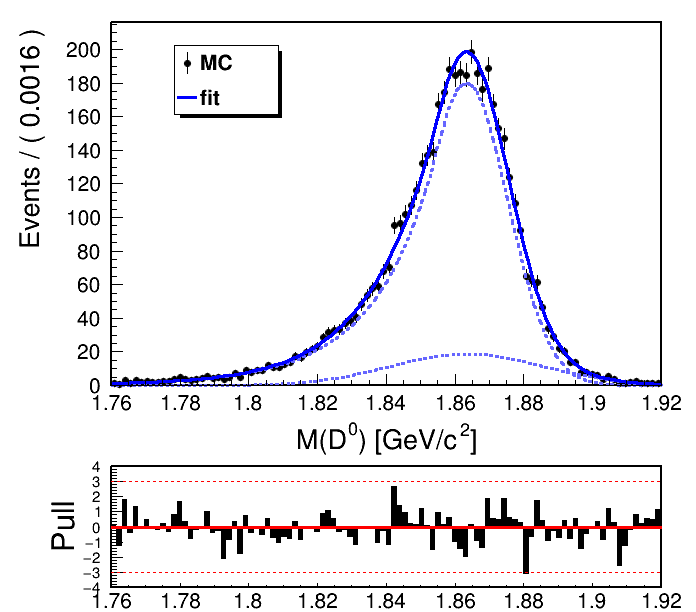

In [17]:
canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

    
# sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)

# ROOT.RooFit.RooConst(0)
# sig1 = ROOT.RooJohnson("sig1", "Signal component 1", x,mu, para_lambda,gamma,delta)

sig2 = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
# sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, mean, Novo_width, Novo_tail)


sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)



# model = ROOT.RooCBShape("model", "Signal component 2", x, mean, sigma2, alpha, n_CB)

model = ROOT.RooAddPdf("model", "model", [sig1, sig2], sig1frac)


# x.setBins(10000,"cache") 
# model = ROOT.RooFFTConvPdf("model","CB (X) gauss",x,sig2,sig1)

r = model.fitTo(data,NumCPU=12,Range=fitting_region,PrintLevel=-1, Save=1)
# r = model.fitTo(wdata,NumCPU=12,Range=fitting_region,PrintLevel=-1, Save=1)

r.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

#Use sqrt(sum(weights^2)) error instead of Poisson errors
data.plotOn(frame, Name = "data1", DataError= ROOT.RooAbsData.SumW2, XErrorSize=0)

# data.plotOn(frame,Name = "data1", XErrorSize=0)
# wdata.plotOn(frame,Name = "data1", XErrorSize=0, DataError=ROOT.RooAbsData.SumW2)
# wdata.plotOn(frame,Name = "data1", XErrorSize=0,DataError=ROOT.RooAbsData.SumW2)

# 
model.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
model.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

model.plotOn(frame, Name="fitting",)


# sig.paramOn(frame)
frame.GetXaxis().CenterTitle(True)

frame.Draw("PE")


leg1 = ROOT.TLegend(0.25, 0.75, 0.4, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.22)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.15)
pullplot.GetYaxis().SetLabelSize(0.105)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
# canv.SaveAs("/media/jykim/T7/saved_plots/fitting/results/phigamma/MCrd_isSignal_Vg.png")
canv.SaveAs("/media/jykim/T7/saved_plots/fitting/results/antiKstargamma/MCrd_isSignal_antiKstarg.png")

# canv.SaveAs("test_Default.png")

f = ROOT.TFile("antiKstarg_MC15rd_Vg_fitresult_D0M.root", "RECREATE")
r.Write("antiKstarg")
f.Close()

In [18]:
# ROOT.RooClassFactory.makePdf("MyPdf_one_minus_squared_para", "x,c0", "", "c0*(1-x*x)")
ROOT.gROOT.ProcessLineSync(".x MyPdf_one_minus_squared_para.cxx+")

94751586987264

(MyPdf_one_minus_squared_para) An instance of MyPdf_one_minus_squared_para.


Info in <TUnixSystem::ACLiC>: creating shared library /home/jykim/workspace/DRAW_and_FITTING/main/FITTING/antiKstargamma/MC15rd/./MyPdf_one_minus_squared_para_cxx.so


In [19]:
c0 = ROOT.RooRealVar("c0", "c0",0.5, -1,1)


In [20]:
fitting_region = (-1,1)
x = ROOT.RooRealVar("D0_cosHel_0", "cos#theta_{H}", fitting_region[0], fitting_region[1], "")
model = ROOT.MyPdf_one_minus_squared_para("model", "pdf", x, c0)
# x.setBins(50)
# l = ROOT.RooArgList(x)
# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, scale_factor)
# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, 1)

# data = ROOT.RooDataHist("sighist", "sighist", l, TH1F, 1)


[#1] INFO:Eval -- RooRealVar::setRange(D0_cosHel_0) new range named 'fit' created with bounds [-1,1]
[#0] WARNING:InputArguments -- RooAbsPdf::fitTo(model) WARNING: a likelihood fit is requested of what appears to be weighted data.
       While the estimated values of the parameters will always be calculated taking the weights into account,
       there are multiple ways to estimate the errors of the parameters. You are advised to make an 
       explicit choice for the error calculation:
           - Either provide SumW2Error(true), to calculate a sum-of-weights-corrected HESSE error matrix
             (error will be proportional to the number of events in MC).
           - Or provide SumW2Error(false), to return errors from original HESSE error matrix
             (which will be proportional to the sum of the weights, i.e., a dataset with <sum of weights> events).
           - Or provide AsymptoticError(true), to use the asymptotically correct expression
             (for details se

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file /media/jykim/T7/saved_plots/fitting/results/antiKstargamma/MCrd_isSignal_antiKstarg_cosHel.png has been created


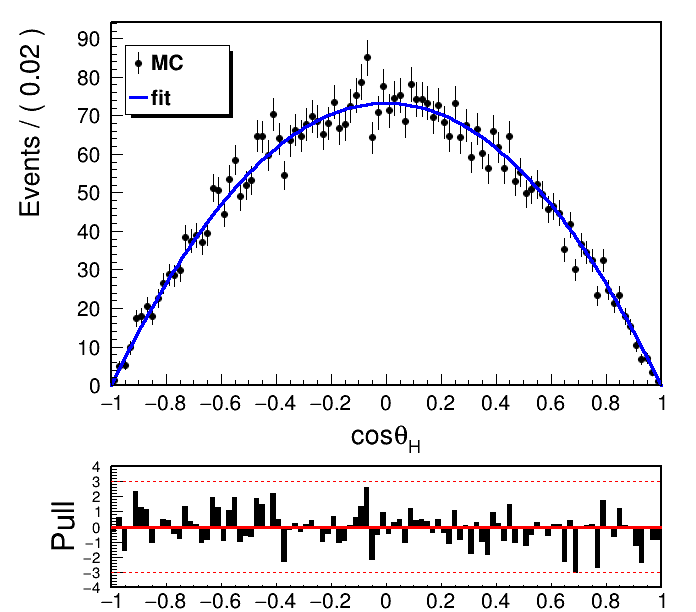

In [21]:
canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))




# model = ROOT.RooCBShape("model", "Signal component 2", x, mean, sigma2, alpha, n_CB)

# model = ROOT.RooAddPdf("model", "model", [sig1, sig2], sig1frac)


r = model.fitTo(data,NumCPU=12,Range=fitting_region,PrintLevel=-1, Save=1)

r.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

# data.plotOn(frame,Name = "data1", XErrorSize=0)
data.plotOn(frame, Name = "data1", DataError= ROOT.RooAbsData.SumW2, XErrorSize=0)

# 
# model.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# model.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# # sig.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

model.plotOn(frame, Name="fitting",)


# sig.paramOn(frame)
frame.GetXaxis().CenterTitle(True)

frame.Draw("PE")


leg1 = ROOT.TLegend(0.18, 0.75, 0.33, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.22)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.15)
pullplot.GetYaxis().SetLabelSize(0.105)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs("/media/jykim/T7/saved_plots/fitting/results/antiKstargamma/MCrd_isSignal_antiKstarg_cosHel.png")
# canv.SaveAs("phi_massveto_1ab_signal_cosHel.png")

# f = ROOT.TFile("phig_MC15rd_Vg_fitresult_cosHel.root", "RECREATE")
# r.Write("phig")
# f.Close()
